# Impoting Data

In [1]:
import pandas as pd

In [2]:
dF = pd.read_csv(r'healthcare-dataset-stroke-data.csv')

In [3]:
dF.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


# Checking Missing Values

In [4]:
dF.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [5]:
nan_bmi_stroke = dF[dF['bmi'].isna() & (dF['stroke'] == 1)].shape[0]
non_nan_bmi_stroke = dF[dF['bmi'].notna() & (dF['stroke'] == 1)].shape[0]

print(f"Number of stroke cases with NaN BMI: {nan_bmi_stroke}")
print(f"Number of stroke cases with non-NaN BMI: {non_nan_bmi_stroke}")

Number of stroke cases with NaN BMI: 40
Number of stroke cases with non-NaN BMI: 209


# Checking Outiers and Imputing Values

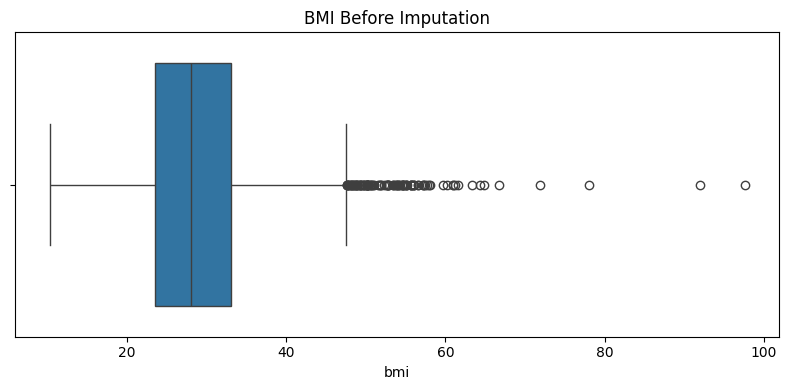

Variance before imputation: 61.68636419426886


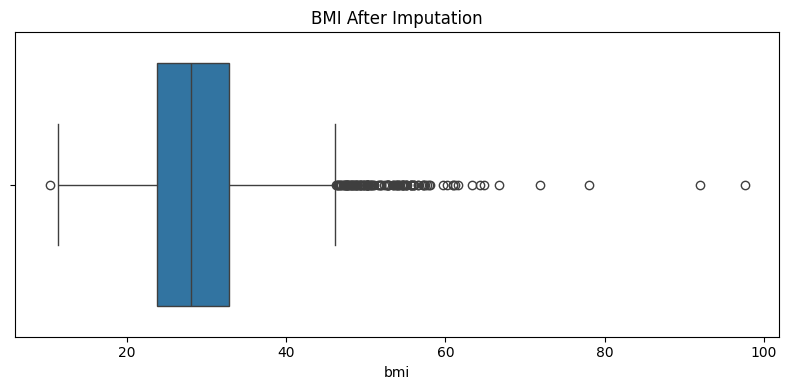

Variance after imputation: 59.283259900892446


In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

# Plot before imputation
plt.figure(figsize=(8, 4))
sns.boxplot(x=dF['bmi'])
plt.title('BMI Before Imputation')
plt.tight_layout()
plt.show()

# Variance before imputation
print("Variance before imputation:", dF['bmi'].var())

# Imputation using median
imputer = SimpleImputer(strategy='median')
dF['bmi'] = imputer.fit_transform(dF[['bmi']])

# Plot after imputation
plt.figure(figsize=(8, 4))
sns.boxplot(x=dF['bmi'])
plt.title('BMI After Imputation')
plt.tight_layout()
plt.show()

# Variance after imputation
print("Variance after imputation:", dF['bmi'].var())


Used median for imputation for numeric BMI which has outliers, because it isn’t affected by extreme values, unlike the mean.

# Capping BMI

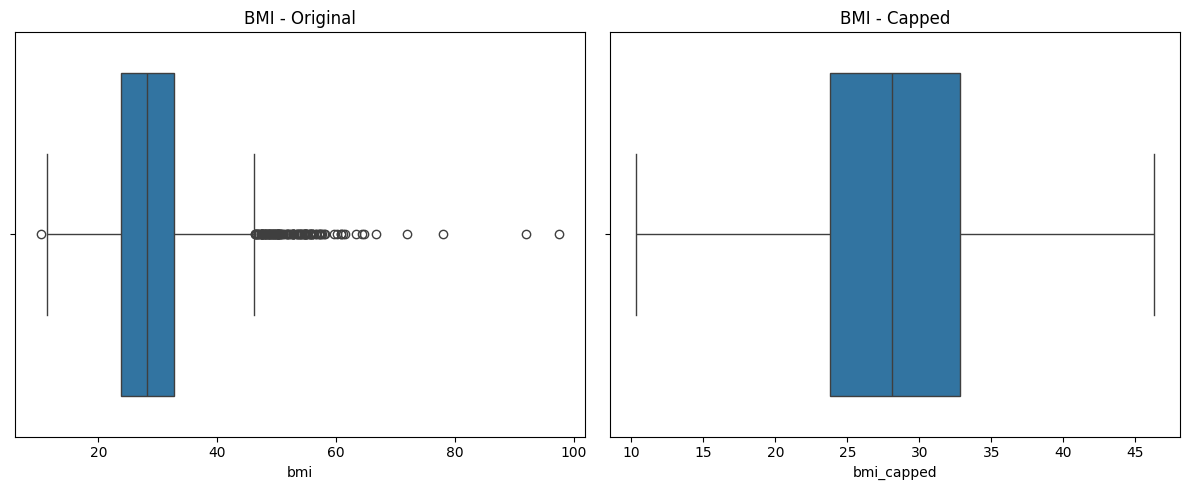

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

def cap_outliers_iqr(df, column):
    Q1 = dF[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    capped = dF[column].clip(lower, upper)
    return capped, lower, upper

# Apply IQR capping to 'bmi'
dF['bmi_capped'], bmi_lower, bmi_upper = cap_outliers_iqr(dF, 'bmi')

# Plot original and capped BMI side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.boxplot(x=dF['bmi'], ax=axes[0]).set_title('BMI - Original')
sns.boxplot(x=dF['bmi_capped'], ax=axes[1]).set_title('BMI - Capped')

plt.tight_layout()
plt.show()

In [8]:
dF.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,bmi_capped
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,36.6
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1,28.1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,32.5
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,34.4
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,24.0
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1,29.0
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1,27.4
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1,22.8
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,28.1,Unknown,1,28.1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1,24.2


In [9]:
dF.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
bmi_capped           0
dtype: int64

# Categorical Feature Vizuliazation

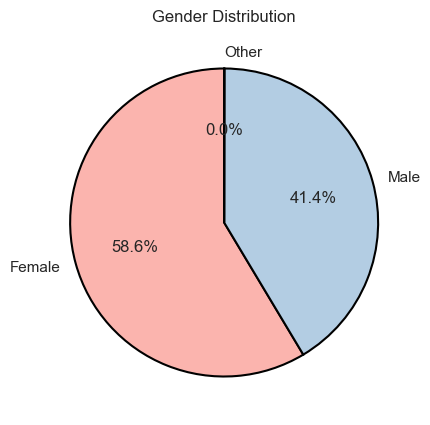

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import seaborn as sns
sns.set_theme(style="whitegrid")


sns.set_palette("Set2")
plt.figure(figsize=(5, 5))
dF['gender'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=plt.cm.Pastel1.colors, wedgeprops={'edgecolor': 'black', 'linewidth': 1.5})
plt.title('Gender Distribution')
plt.ylabel('')
plt.show()


In [11]:
dF['gender'].value_counts()

gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64

In [12]:
dF['gender'] = dF['gender'].replace('Other','Female')
dF['gender'].value_counts()

gender
Female    2995
Male      2115
Name: count, dtype: int64

Since in 'Gender' feature we have only one 'Other' value in this data so we simply replace with 'Female' one. this change improves model stability, reduces unnecessary complexity, and helps ensure the patterns learned are meaningful.

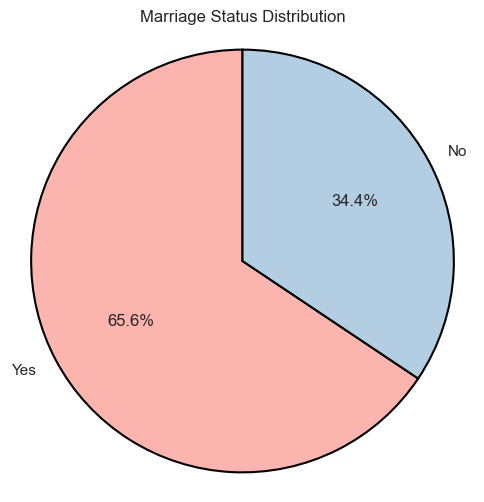

In [13]:
import matplotlib.pyplot as plt

married_counts = dF['ever_married'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(married_counts, labels=married_counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Pastel1.colors, wedgeprops={'edgecolor': 'black', 'linewidth': 1.5})
plt.title('Marriage Status Distribution')
plt.axis('equal')
plt.show()



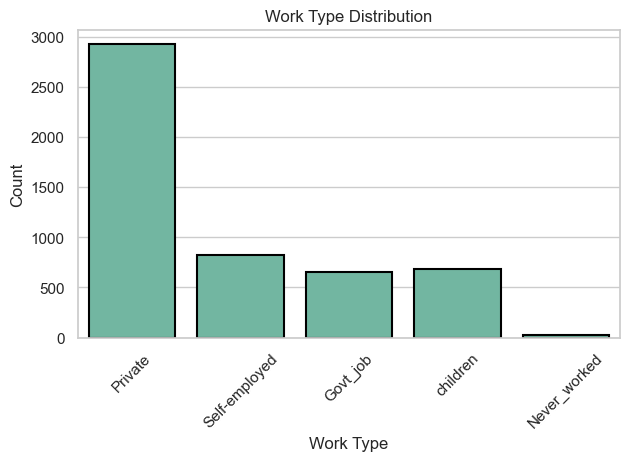

In [14]:
plt.figure(figsize=(7, 4))
sns.countplot(x='work_type', data=dF,edgecolor = 'black' ,linewidth = 1.5)
plt.title('Work Type Distribution')
plt.xlabel('Work Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


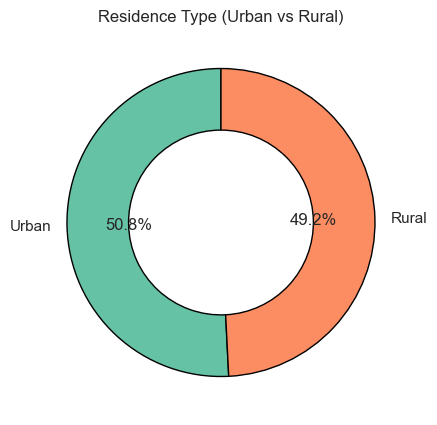

In [15]:
res_counts = dF['Residence_type'].value_counts()
plt.figure(figsize=(5, 5))
plt.pie(res_counts, labels=res_counts.index, autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.4, edgecolor = 'black'))
plt.title('Residence Type (Urban vs Rural)')
plt.show()

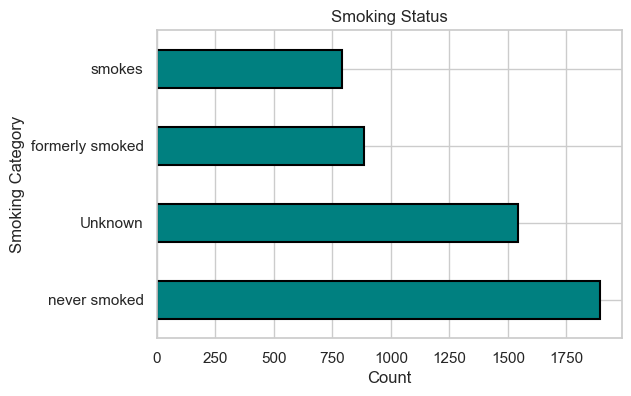

In [16]:
plt.figure(figsize=(6, 4))
dF['smoking_status'].value_counts().plot(kind='barh', color='teal',edgecolor = 'black', linewidth = 1.5)
plt.title('Smoking Status')
plt.xlabel('Count')
plt.ylabel('Smoking Category')
plt.show()

# Encoding Feature

In [17]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

cat_cols = ['work_type', 'smoking_status']
label_cols = ['gender', 'Residence_type', 'ever_married']

dF_encoded_first = pd.get_dummies(dF, columns=cat_cols, drop_first=True, dtype=int)

le = LabelEncoder()
dF_label_encoded = dF[label_cols].apply(le.fit_transform)

dF_encoded = pd.concat([dF_encoded_first.drop(columns=label_cols), dF_label_encoded], axis=1)


In [18]:
dF_encoded

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,bmi_capped,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,gender,Residence_type,ever_married
0,9046,67.0,0,1,228.69,36.6,1,36.6,0,1,0,0,1,0,0,1,1,1
1,51676,61.0,0,0,202.21,28.1,1,28.1,0,0,1,0,0,1,0,0,0,1
2,31112,80.0,0,1,105.92,32.5,1,32.5,0,1,0,0,0,1,0,1,0,1
3,60182,49.0,0,0,171.23,34.4,1,34.4,0,1,0,0,0,0,1,0,1,1
4,1665,79.0,1,0,174.12,24.0,1,24.0,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,80.0,1,0,83.75,28.1,0,28.1,0,1,0,0,0,1,0,0,1,1
5106,44873,81.0,0,0,125.20,40.0,0,40.0,0,0,1,0,0,1,0,0,1,1
5107,19723,35.0,0,0,82.99,30.6,0,30.6,0,0,1,0,0,1,0,0,0,1
5108,37544,51.0,0,0,166.29,25.6,0,25.6,0,1,0,0,1,0,0,1,0,1


# Normalization

In [19]:
from sklearn.preprocessing import MinMaxScaler

columns_to_scale = ['age','bmi_capped','avg_glucose_level']
scaler = MinMaxScaler()

scaler.fit(dF_encoded[columns_to_scale]) #fitting data
columns_scaled=scaler.transform(dF_encoded[columns_to_scale]) #transforming data

columns_scaled=pd.DataFrame(columns_scaled, columns=columns_to_scale)

In [20]:
print("Original Data Description:")
np.round(dF_encoded[columns_to_scale].describe(), 1) # describing old original dataframe

Original Data Description:


,age,bmi_capped,avg_glucose_level
count,5110.0,5110.0,5110.0
mean,43.2,28.7,106.1
std,22.6,7.1,45.3
min,0.1,10.3,55.1
25%,25.0,23.8,77.2
50%,45.0,28.1,91.9
75%,61.0,32.8,114.1
max,82.0,46.3,271.7


In [21]:
print("Scaled Data Description:")
np.round(columns_scaled.describe(),1) # describing scaled dataframe

Scaled Data Description:


,age,bmi_capped,avg_glucose_level
count,5110.0,5110.0,5110.0
mean,0.5,0.5,0.2
std,0.3,0.2,0.2
min,0.0,0.0,0.0
25%,0.3,0.4,0.1
50%,0.5,0.5,0.2
75%,0.7,0.6,0.3
max,1.0,1.0,1.0


In [22]:
dF_encoded[columns_to_scale] = columns_scaled

In [23]:
dF_encoded.head(10)

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,bmi_capped,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,gender,Residence_type,ever_married
0,9046,0.816895,0,1,0.801265,36.6,1,0.730556,0,1,0,0,1,0,0,1,1,1
1,51676,0.743652,0,0,0.679023,28.1,1,0.494444,0,0,1,0,0,1,0,0,0,1
2,31112,0.975586,0,1,0.234512,32.5,1,0.616667,0,1,0,0,0,1,0,1,0,1
3,60182,0.597168,0,0,0.536008,34.4,1,0.669444,0,1,0,0,0,0,1,0,1,1
4,1665,0.963379,1,0,0.549349,24.0,1,0.380556,0,0,1,0,0,1,0,0,0,1
5,56669,0.987793,0,0,0.605161,29.0,1,0.519444,0,1,0,0,1,0,0,1,1,1
6,53882,0.902344,1,1,0.069107,27.4,1,0.475000,0,1,0,0,0,1,0,1,0,1
7,10434,0.841309,0,0,0.181285,22.8,1,0.347222,0,1,0,0,0,1,0,0,1,0
8,27419,0.719238,0,0,0.097082,28.1,1,0.494444,0,1,0,0,0,0,0,0,0,1
9,60491,0.951172,0,0,0.015927,24.2,1,0.386111,0,1,0,0,0,0,0,0,1,1


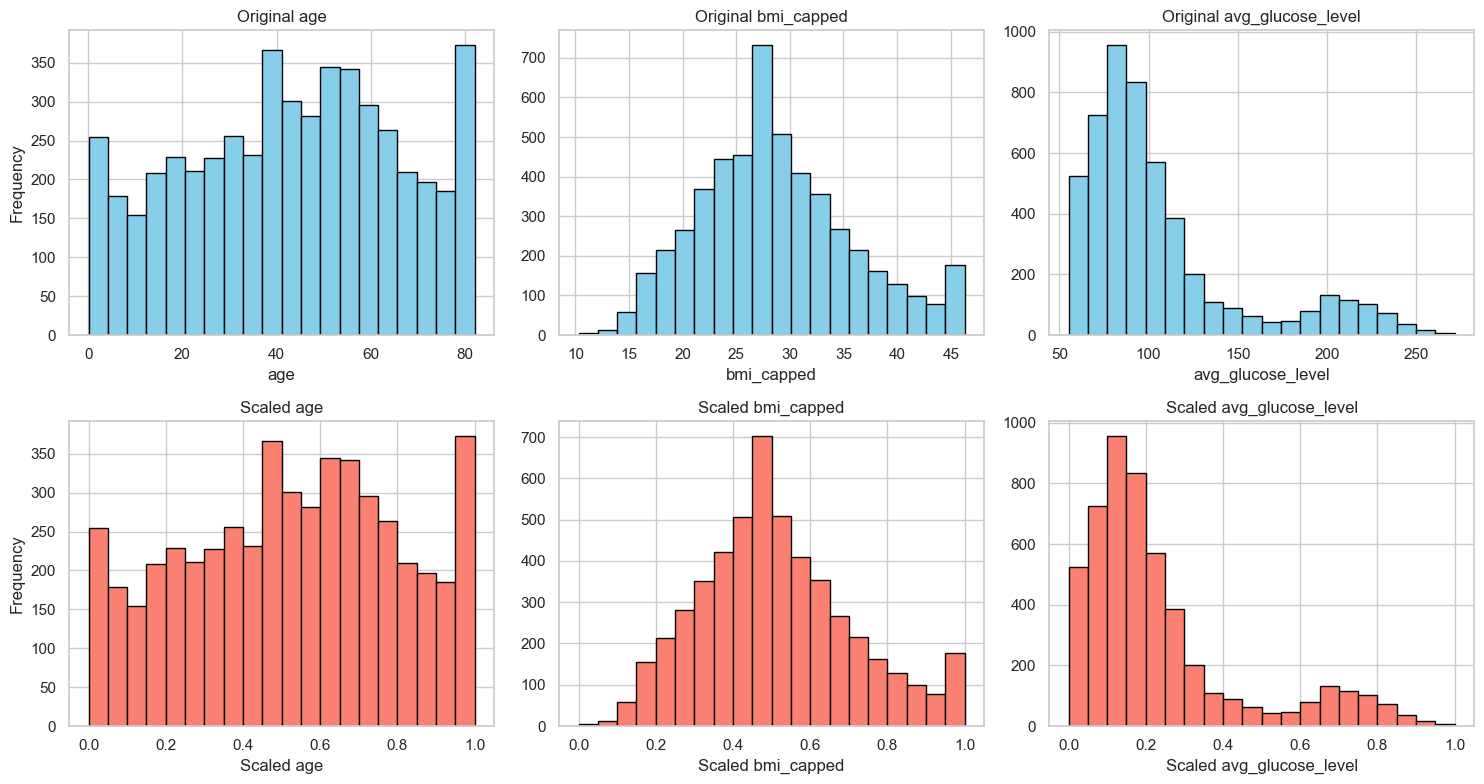

In [24]:

fig, axs = plt.subplots(2, 3, figsize=(15, 8))

for i, col in enumerate(columns_to_scale):

    axs[0, i].hist(dF[col], bins=20, color='skyblue', edgecolor='black')
    axs[0, i].set_title(f'Original {col}')
    axs[0, i].set_xlabel(col)


    axs[1, i].hist(columns_scaled[col], bins=20, color='salmon', edgecolor='black')
    axs[1, i].set_title(f'Scaled {col}')
    axs[1, i].set_xlabel(f'Scaled {col}')

axs[0, 0].set_ylabel("Frequency")
axs[1, 0].set_ylabel("Frequency")
plt.tight_layout()
plt.show()

#Correlation

In [25]:
dF_new = dF_encoded.drop(columns=['id'])

In [26]:
corr = dF_new.select_dtypes(include='number').corr()

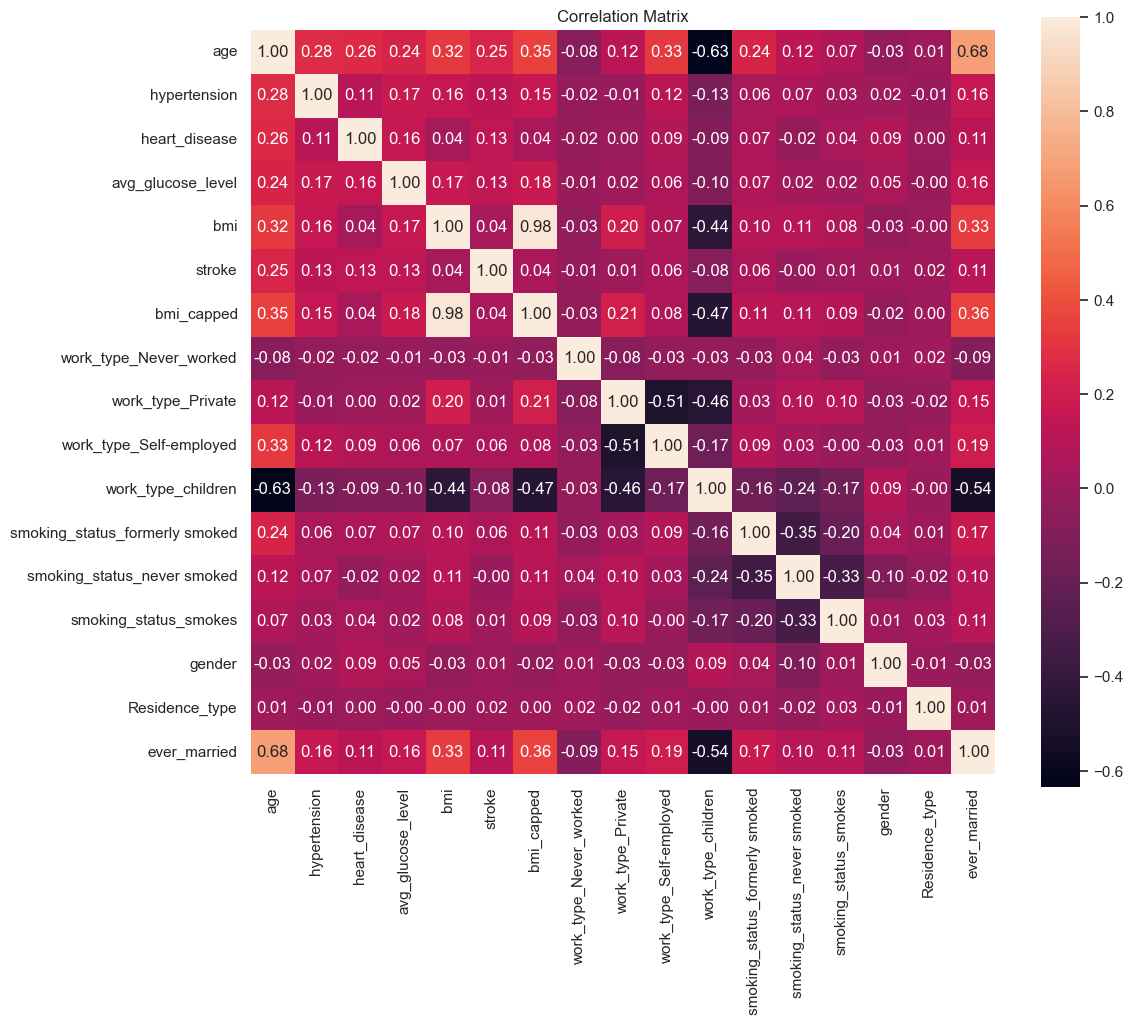

In [27]:
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, fmt=".2f", square=True)
plt.title("Correlation Matrix")

plt.show()

In [28]:
Correlation = corr['stroke'].drop('stroke')

In [29]:
Correlation

age                               0.245257
hypertension                      0.127904
heart_disease                     0.134914
avg_glucose_level                 0.131945
bmi                               0.036110
bmi_capped                        0.042700
work_type_Never_worked           -0.014882
work_type_Private                 0.011888
work_type_Self-employed           0.062168
work_type_children               -0.083869
smoking_status_formerly smoked    0.064556
smoking_status_never smoked      -0.004129
smoking_status_smokes             0.008939
gender                            0.009117
Residence_type                    0.015458
ever_married                      0.108340
Name: stroke, dtype: float64

# Feature Selection

In [30]:
dF_encoded.drop('id', axis=1, inplace=True)

In [31]:
X = dF_encoded.drop('stroke', axis=1)
y = dF_encoded['stroke']


In [32]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
estimator = RandomForestClassifier(random_state=42)
selector = RFE(estimator, n_features_to_select=7)
selector.fit(X, y)

RFE(estimator=RandomForestClassifier(random_state=42), n_features_to_select=7)

In [33]:
selected_features = X.columns[selector.support_]

In [34]:
top_feature = X[selected_features]
top_feature

,age,avg_glucose_level,bmi,bmi_capped,work_type_Private,smoking_status_never smoked,Residence_type
0,0.816895,0.801265,36.6,0.730556,1,0,1
1,0.743652,0.679023,28.1,0.494444,0,1,0
2,0.975586,0.234512,32.5,0.616667,1,1,0
3,0.597168,0.536008,34.4,0.669444,1,0,1
4,0.963379,0.549349,24.0,0.380556,0,1,0
...,...,...,...,...,...,...,...
5105,0.975586,0.132167,28.1,0.494444,1,1,1
5106,0.987793,0.323516,40.0,0.825000,0,1,1
5107,0.426270,0.128658,30.6,0.563889,0,1,0
5108,0.621582,0.513203,25.6,0.425000,1,0,0


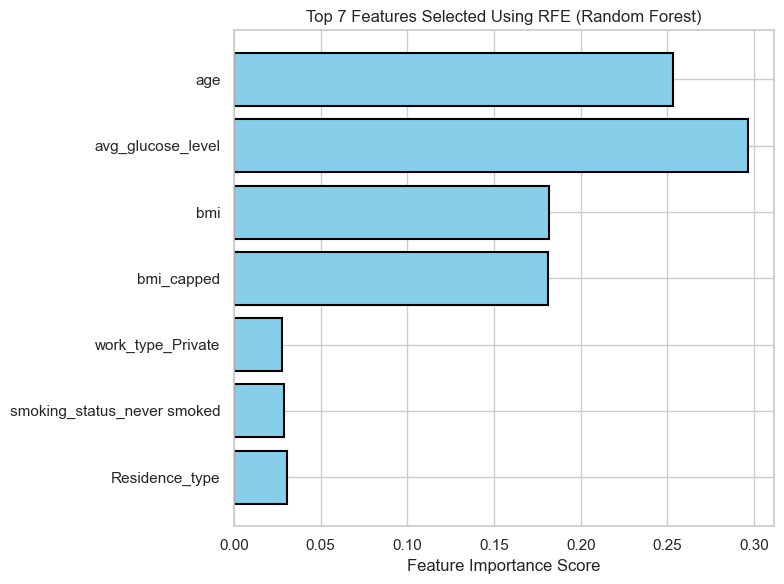

In [35]:
import matplotlib.pyplot as plt


estimator.fit(top_feature, y)

importances = estimator.feature_importances_

plt.figure(figsize=(8, 6))
plt.barh(selected_features, importances, color='Skyblue', edgecolor='black', linewidth=1.5)
plt.xlabel("Feature Importance Score")
plt.title("Top 7 Features Selected Using RFE (Random Forest)")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


# Checking Biasness

In [36]:
X = top_feature
y = dF['stroke']

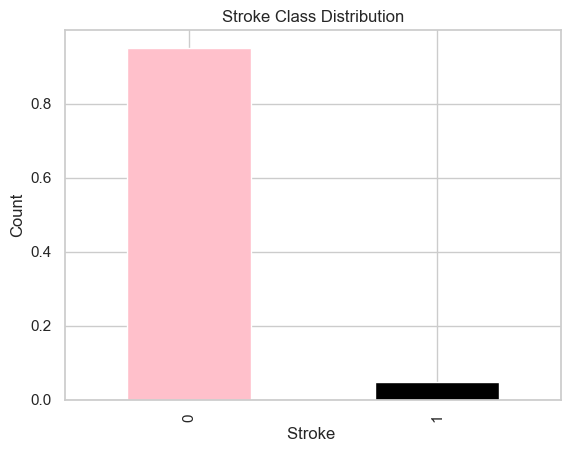

stroke
0    4861
1     249
Name: count, dtype: int64


In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

dF['stroke'].value_counts(normalize = True).plot(kind = 'bar', color = ['pink','black'])
plt.title("Stroke Class Distribution")
plt.xlabel("Stroke ")
plt.ylabel("Count")
plt.show()
print(dF['stroke'].value_counts())

# **balancing model**

In [38]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_resample(X, y)

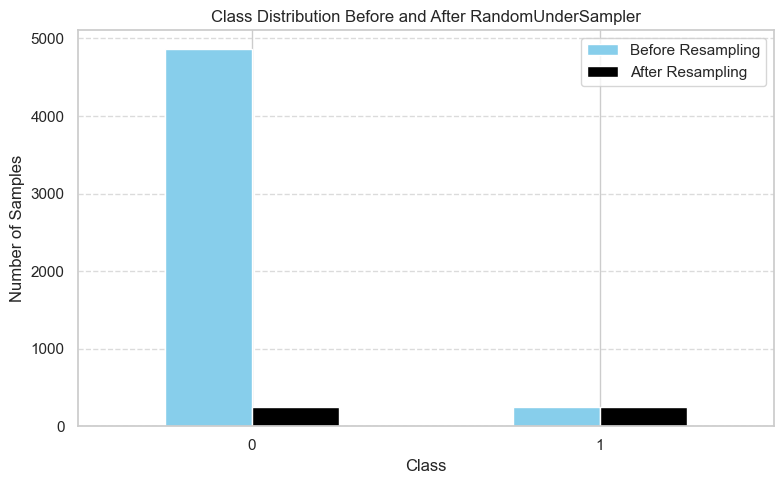

In [39]:
import matplotlib.pyplot as plt
from collections import Counter


before_counts = Counter(y)

after_counts = Counter(y_res)

balance_df = pd.DataFrame({
    'Before Resampling': pd.Series(before_counts),
    'After Resampling': pd.Series(after_counts)
})

balance_df.plot(kind='bar', figsize=(8,5), color=['skyblue', 'black'])
plt.title('Class Distribution Before and After RandomUnderSampler')
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [40]:
print('x train and y train resampled shapes: ', X_res.shape, y_res.shape)

x train and y train resampled shapes:  (498, 7) (498,)


In [41]:
print('number of stroke data after undersampling: ',len(X_res[y_res==1]))
print('number of non stroke data after undersampling: ',len(X_res[y_res==0]))

number of stroke data after undersampling:  249
number of non stroke data after undersampling:  249


In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test =  train_test_split(X_res,y_res,test_size=0.2,random_state = 42)

In [43]:
print('x train and y train shape: ', X_train.shape, y_train.shape)
print('x test and y test shape: ',X_test.shape, y_test.shape)

x train and y train shape:  (398, 7) (398,)
x test and y test shape:  (100, 7) (100,)


# Hyper parameter tunning

In [44]:
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

In [45]:
rf_prams = {
            'n_estimators': [100, 200],
            'max_depth': [5, 10, None],
            'min_samples_split': [2, 5]
        }

rfc = RandomForestClassifier(random_state=42)

grid_search_rf = GridSearchCV(
    estimator=rfc,
    param_grid=rf_prams,
    scoring='f1',
    cv=5,
    n_jobs=-1,
    verbose=1
)

# Fit rf
grid_search_rf.fit(X_train, y_train)

# Best estimator and report
rf_best = grid_search_rf.best_estimator_
print("Best rf Parameters:", grid_search_rf.best_params_)

y_pred_lgb = rf_best.predict(X_test)
print("Classification Report:\n",classification_report(y_test, y_pred_lgb))

Fitting 5 folds for each of 12 candidates, totalling 60 fits


Best rf Parameters: {'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 200}
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.65      0.72        51
           1       0.69      0.84      0.76        49

    accuracy                           0.74       100
   macro avg       0.75      0.74      0.74       100
weighted avg       0.75      0.74      0.74       100



# **Ensemble technique**

## Stacking

In [46]:
# --- Advanced Stacking with Bagging, Boosting, and LightGBM ---

from sklearn.ensemble import StackingClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

# Bagging model
bagging_model = BaggingClassifier(
    estimator=DecisionTreeClassifier(max_depth=5),
    n_estimators=50,
    random_state=42
)

# Gradient Boosting model
gb_model = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.05,
    max_depth=3,
    random_state=42
)

# Meta learner
meta_learner = LogisticRegression(
    max_iter=1000,
    random_state=42,
    class_weight='balanced'
)

# Base learners including LightGBM
base_learners = [
    ('lgb', rf_best),
    ('bag', bagging_model),
    ('boost', gb_model)
]

# Stacking classifier with passthrough
stacked_model = StackingClassifier(
    estimators=base_learners,
    final_estimator=meta_learner,
    cv=5,
    passthrough=True,
    n_jobs=-1
)

# Fit Model
stacked_model.fit(X_train, y_train)

StackingClassifier(cv=5,
                   estimators=[('lgb',
                                RandomForestClassifier(max_depth=5,
                                                       n_estimators=200,
                                                       random_state=42)),
                               ('bag',
                                BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=5),
                                                  n_estimators=50,
                                                  random_state=42)),
                               ('boost',
                                GradientBoostingClassifier(learning_rate=0.05,
                                                           random_state=42))],
                   final_estimator=LogisticRegression(class_weight='balanced',
                                                      max_iter=1000,
                                                      random_state=42),
                   n_jobs=-1, passthrough=True)

In [47]:
# Evaluate Model
y_pred_stack = stacked_model.predict(X_test)
print("Classification Report:\n",classification_report(y_test, y_pred_stack))

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.69      0.76        51
           1       0.73      0.88      0.80        49

    accuracy                           0.78       100
   macro avg       0.79      0.78      0.78       100
weighted avg       0.79      0.78      0.78       100



In [48]:
train_preds = stacked_model.predict(X_train)
test_preds = stacked_model.predict(X_test)

from sklearn.metrics import accuracy_score, f1_score

print("Train Accuracy:", accuracy_score(y_train, train_preds))
print("Test Accuracy:", accuracy_score(y_test, test_preds))

print("Train F1 Score:", f1_score(y_train, train_preds))
print("Test F1 Score:", f1_score(y_test, test_preds))

Train Accuracy: 0.821608040201005
Test Accuracy: 0.78
Train F1 Score: 0.8305489260143198
Test F1 Score: 0.7962962962962963


Random prediction AUROC = 0.5
Stacked Model AUROC = 0.8111244497799119


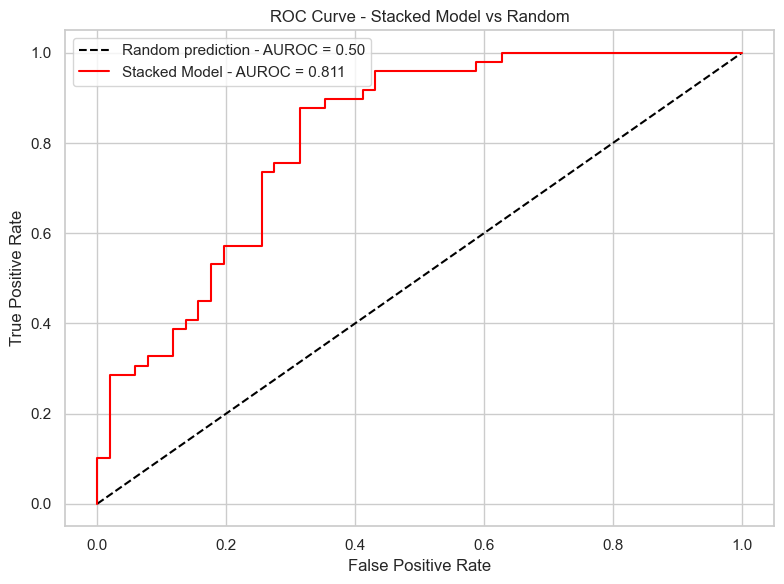

In [49]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Get predicted probabilities for the positive class
stacked_probs = stacked_model.predict_proba(X_test)[:, 1]

# Generate random probabilities (baseline)
rand_probs = [0 for _ in range(len(y_test))]

# Calculate AUROC scores
rand_auc = roc_auc_score(y_test, rand_probs)
stacked_auc = roc_auc_score(y_test, stacked_probs)

# Print AUROC values
print('Random prediction AUROC =', rand_auc)
print('Stacked Model AUROC =', stacked_auc)

# Compute ROC curves
rand_fpr, rand_tpr, _ = roc_curve(y_test, rand_probs)
stacked_fpr, stacked_tpr, _ = roc_curve(y_test, stacked_probs)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(rand_fpr, rand_tpr, linestyle='--', color='black', label='Random prediction - AUROC = %0.2f' % rand_auc)
plt.plot(stacked_fpr, stacked_tpr, color='red', label='Stacked Model - AUROC = %0.3f' % stacked_auc)
plt.title('ROC Curve - Stacked Model vs Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
import pickle

# Combine everything into a dictionary
all_objects = {
    'stacked_model': stacked_model,
    'scaler': scaler,
    'imputer': imputer,
    'selected_features': selected_features.tolist(),
    'bmi_bounds': {'lower': bmi_lower, 'upper': bmi_upper}
}

# Save all in one file
with open('all_assets.pkl', 'wb') as file:
    pickle.dump(all_objects, file)

print("All models and transformers saved successfully.")

All models and transformers saved successfully.
